In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df_hr = pd.read_csv('hr_data.csv')
df_hr

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...
14994,87670,2,151,3,0,1,0,support,low
14995,87673,2,160,3,0,1,0,support,low
14996,87679,2,143,3,0,1,0,support,low
14997,87681,6,280,4,0,1,0,support,low


In [16]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employee_id            14999 non-null  int64 
 1   number_project         14999 non-null  int64 
 2   average_montly_hours   14999 non-null  int64 
 3   time_spend_company     14999 non-null  int64 
 4   Work_accident          14999 non-null  int64 
 5   left                   14999 non-null  int64 
 6   promotion_last_5years  14999 non-null  int64 
 7   department             14999 non-null  object
 8   salary                 14999 non-null  object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


In [17]:
df_hr.shape

(14999, 9)

In [18]:
#statistical distribution of the dataset
df_hr.describe()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [19]:
# look for missing data
df_hr.isnull().sum()

employee_id              0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [20]:
df_emp_eval = pd.read_excel('employee_satisfaction_evaluation.xlsx')
df_emp_eval

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52
...,...,...,...
14994,87670,0.40,0.57
14995,87673,0.37,0.48
14996,87679,0.37,0.53
14997,87681,0.11,0.96


In [21]:
#join tables 

df =  df_hr.set_index("employee_id").join(df_emp_eval.set_index("EMPLOYEE #"))
df = df.reset_index()
df

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52
...,...,...,...,...,...,...,...,...,...,...,...
14994,87670,2,151,3,0,1,0,support,low,0.40,0.57
14995,87673,2,160,3,0,1,0,support,low,0.37,0.48
14996,87679,2,143,3,0,1,0,support,low,0.37,0.53
14997,87681,6,280,4,0,1,0,support,low,0.11,0.96


In [22]:
df.shape

(14999, 11)

In [23]:
df.isnull().sum()

employee_id               0
number_project            0
average_montly_hours      0
time_spend_company        0
Work_accident             0
left                      0
promotion_last_5years     0
department                0
salary                    0
satisfaction_level       27
last_evaluation          27
dtype: int64

In [24]:
df.fillna(df.mean(), inplace = True)
df

C:\Users\MukundiMphaphuli\AppData\Local\Temp\ipykernel_38212\2280612394.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace = True)


,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52
...,...,...,...,...,...,...,...,...,...,...,...
14994,87670,2,151,3,0,1,0,support,low,0.40,0.57
14995,87673,2,160,3,0,1,0,support,low,0.37,0.48
14996,87679,2,143,3,0,1,0,support,low,0.37,0.53
14997,87681,6,280,4,0,1,0,support,low,0.11,0.96


In [25]:
df.isnull().sum()

employee_id              0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
satisfaction_level       0
last_evaluation          0
dtype: int64

In [26]:
df = df.drop(columns = 'employee_id')
df

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,2,157,3,0,1,0,sales,low,0.38,0.53
1,5,262,6,0,1,0,sales,medium,0.80,0.86
2,7,272,4,0,1,0,sales,medium,0.11,0.88
3,5,223,5,0,1,0,sales,low,0.72,0.87
4,2,159,3,0,1,0,sales,low,0.37,0.52
...,...,...,...,...,...,...,...,...,...,...
14994,2,151,3,0,1,0,support,low,0.40,0.57
14995,2,160,3,0,1,0,support,low,0.37,0.48
14996,2,143,3,0,1,0,support,low,0.37,0.53
14997,6,280,4,0,1,0,support,low,0.11,0.96


In [27]:
df.groupby('department').sum()

C:\Users\MukundiMphaphuli\AppData\Local\Temp\ipykernel_38212\3344774905.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('department').sum()


,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,4683,248119,4256,164,273,3,758.17283,879.452250
RandD,3033,158030,2650,134,121,27,487.80000,560.446125
accounting,2934,154292,2702,96,204,14,446.68283,550.706125
hr,2701,146828,2480,89,215,15,442.53566,524.006125
management,2432,126787,2711,103,91,69,391.76566,456.234499
marketing,3164,171073,3063,138,203,43,530.62283,613.946125
product_mng,3434,180369,3135,132,198,0,559.19566,644.662250
sales,15634,831773,14631,587,1014,100,2543.77981,2938.236749
support,8479,447490,7563,345,555,20,1377.90849,1611.534499


In [28]:
df.groupby('department').mean()

C:\Users\MukundiMphaphuli\AppData\Local\Temp\ipykernel_38212\836550178.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('department').mean()


,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445,0.617908,0.716750
RandD,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307,0.619822,0.712130
accounting,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253,0.582377,0.718000
hr,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298,0.598830,0.709075
management,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524,0.621850,0.724182
marketing,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117,0.618442,0.715555
product_mng,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000,0.619951,0.714703
sales,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155,0.614440,0.709719
support,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973,0.618173,0.722985


C:\Users\MukundiMphaphuli\AppData\Local\Temp\ipykernel_38212\2394643339.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


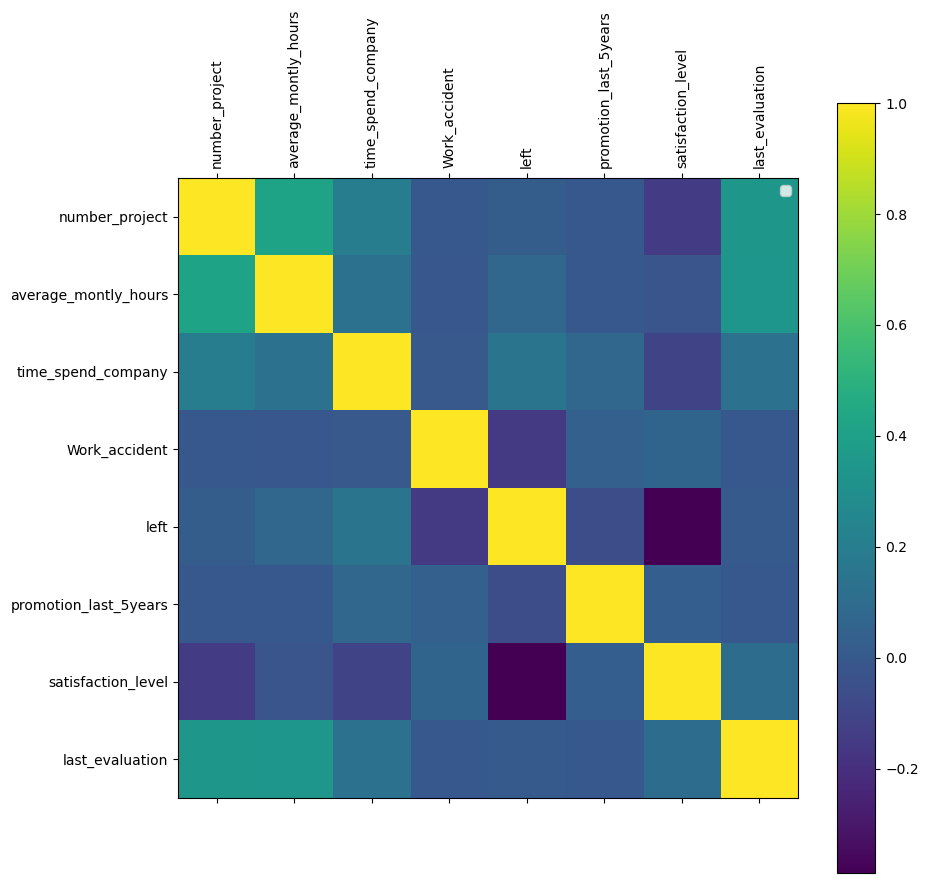

In [29]:
import matplotlib.pyplot as plt 

def plot_corr(df, size=10):
    
    corr = df.corr()
    fig, ax  = plt.subplots(figsize=(size,size))
    ax.legend()
    cax = ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation = "vertical")
    plt.yticks(range(len(corr.columns)), corr.columns)
    
plot_corr(df)


In [30]:
categorical = ['department','salary']
df1 = pd.get_dummies(df, columns = categorical , drop_first = True )
df1

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,2,157,3,0,1,0,0.38,0.53,0,0,0,0,0,0,1,0,0,1,0
1,5,262,6,0,1,0,0.80,0.86,0,0,0,0,0,0,1,0,0,0,1
2,7,272,4,0,1,0,0.11,0.88,0,0,0,0,0,0,1,0,0,0,1
3,5,223,5,0,1,0,0.72,0.87,0,0,0,0,0,0,1,0,0,1,0
4,2,159,3,0,1,0,0.37,0.52,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,2,151,3,0,1,0,0.40,0.57,0,0,0,0,0,0,0,1,0,1,0
14995,2,160,3,0,1,0,0.37,0.48,0,0,0,0,0,0,0,1,0,1,0
14996,2,143,3,0,1,0,0.37,0.53,0,0,0,0,0,0,0,1,0,1,0
14997,6,280,4,0,1,0,0.11,0.96,0,0,0,0,0,0,0,1,0,1,0


In [31]:
len(df1.columns)

19

In [32]:
len(df1.loc[df1['left']==1])

3571

In [33]:
from sklearn.model_selection import train_test_split

X = df1.drop(['left'], axis=1).values

y = df1['left'].values 

In [34]:
X_train, X_test,y_train, y_test = train_test_split (X,y, test_size=0.3)

In [35]:
from sklearn.preprocessing import StandardScaler 

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [36]:
df_train = pd.DataFrame(X_train)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-1.462349,-1.043489,-0.342844,-0.414286,-0.146975,-0.690570,-1.030268,-0.238486,-0.238931,4.389572,-0.212595,-0.247282,-0.252658,-0.614966,-0.414286,-0.470814,1.019526,-0.862734
1,-0.652453,-0.783350,-1.027422,-0.414286,-0.146975,-0.087744,0.606223,-0.238486,-0.238931,-0.227813,-0.212595,-0.247282,-0.252658,-0.614966,-0.414286,-0.470814,-0.980848,-0.862734
2,0.967340,0.977594,-1.027422,-0.414286,-0.146975,0.073010,-0.270469,-0.238486,-0.238931,-0.227813,-0.212595,-0.247282,3.957914,-0.614966,-0.414286,-0.470814,1.019526,-0.862734
3,0.967340,0.757476,1.026314,-0.414286,-0.146975,-1.052265,-0.679591,-0.238486,-0.238931,-0.227813,-0.212595,-0.247282,-0.252658,-0.614966,2.413793,-0.470814,-0.980848,1.159106
4,0.967340,0.637412,0.341735,-0.414286,-0.146975,1.318850,0.313992,-0.238486,-0.238931,-0.227813,-0.212595,-0.247282,-0.252658,-0.614966,-0.414286,2.123979,-0.980848,-0.862734


In [37]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score 



In [38]:
model = LogisticRegression(solver = 'lbfgs')
model.fit(X_train, y_train)

pred = model.predict(X_test)

print("Acc  {0:2f}%".format(100*accuracy_score(pred, y_test)) )
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

Acc  78.711111%
[[3165  253]
 [ 705  377]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      3418
           1       0.60      0.35      0.44      1082

    accuracy                           0.79      4500
   macro avg       0.71      0.64      0.65      4500
weighted avg       0.77      0.79      0.77      4500



In [39]:
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score 


In [40]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

pred = model.predict(X_test)

print("Acc  {0:2f}%".format(100*accuracy_score(pred, y_test)) )
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
model.fit(X_train, y_train)

pred = model.predict(X_test)

print("Acc  {0:2f}%".format(100*accuracy_score(pred, y_test)) )
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

Acc  98.933333%
[[3409    9]
 [  39 1043]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3418
           1       0.99      0.96      0.98      1082

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.99      4500
weighted avg       0.99      0.99      0.99      4500

Acc  98.977778%
[[3410    8]
 [  38 1044]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3418
           1       0.99      0.96      0.98      1082

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.99      4500
weighted avg       0.99      0.99      0.99      4500



In [41]:

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(9, kernel_initializer = "uniform",activation = "relu", input_dim = 18))
model.add(Dense(1, kernel_initializer = "uniform",activation = "sigmoid")) 

model.compile(optimizer= "adam", loss = "binary_crossentropy",metrics = ['accuracy'])



In [42]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 9)                 171       
                                                                 
 dense_5 (Dense)             (None, 1)                 10        
                                                                 
Total params: 181 (724.00 Byte)
Trainable params: 181 (724.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [47]:
batch_size = 10 

epochs = 10 

history = model.fit(X_train,y_train,batch_size,epochs=epochs,verbose=1, validation_data = (X_test, y_test))

score = model.evaluate(X_test, y_test, verbose = 0)

print("Test loss", score[0])
print("Test Accuracy", score[1])

Epoch 1/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1578 - accuracy: 0.9529 - val_loss: 0.1531 - val_accuracy: 0.9584
Epoch 2/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1574 - accuracy: 0.9523 - val_loss: 0.1501 - val_accuracy: 0.9593
Epoch 3/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1561 - accuracy: 0.9512 - val_loss: 0.1520 - val_accuracy: 0.9604
Epoch 4/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1555 - accuracy: 0.9525 - val_loss: 0.1493 - val_accuracy: 0.9591
Epoch 5/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1545 - accuracy: 0.9525 - val_loss: 0.1495 - val_accuracy: 0.9598
Epoch 6/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1536 - accuracy: 0.9520 - val_loss: 0.1488 - val_accuracy: 0.9598
Epoch 7/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.1533 - accuracy: 0.9525 - val_loss: 0.1482 - val_accuracy:

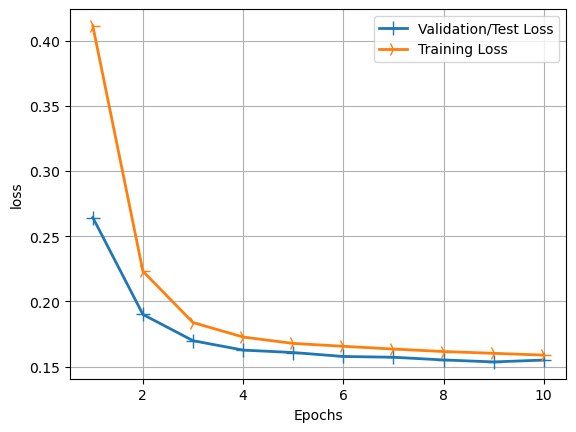

In [46]:
history_dict = history.history 
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)

line1 = plt.plot(epochs, val_loss_values, label="Validation/Test Loss")
line2 = plt.plot(epochs, loss_values, label="Training Loss")
plt.setp(line1, linewidth=2.0, marker="+", markersize=10.0)
plt.setp(line2, linewidth=2.0, marker="4", markersize=10.0)
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.grid(True)
plt.legend()
plt.show()